In [19]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

pd.set_option('display.max_columns', None)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline

In [2]:
# Read data
filepath = '../data/churn_data_processed.csv'
df = pd.read_csv(filepath)

In [3]:
# Select columns for modeling
data = df.copy()
model_cols = ['tenure', 'TotalCharges', 'MonthlyCharges', 'Contract_Two year', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
              'Contract_One year', 'gender', 'TechSupport_Yes', 'OnlineSecurity_Yes', 'Partner', 'PaperlessBilling', 'Churn']
data = df[model_cols]
data.head()

,tenure,TotalCharges,MonthlyCharges,Contract_Two year,InternetService_Fiber optic,PaymentMethod_Electronic check,Contract_One year,gender,TechSupport_Yes,OnlineSecurity_Yes,Partner,PaperlessBilling,Churn
0,-1.277445,-0.992636,-1.160323,False,False,True,False,1,False,False,1,1,0
1,0.066327,-0.172180,-0.259629,False,False,False,True,0,False,True,0,0,0
2,0.514251,-0.193688,-0.746535,False,False,False,True,0,True,True,0,0,0
3,-0.422317,-0.145753,0.808907,False,True,False,False,0,False,False,0,1,0
4,-0.910961,-0.872611,-1.163647,False,False,False,False,1,False,True,0,0,0


In [4]:
# Select X features and y label
X = data.drop(columns=['Churn'])
y = data.Churn

In [5]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection and Evaluation

In [6]:
# Give the input for 10-fold cross validation
kfold = KFold(n_splits=5)

# Initialize models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC(kernel='linear', random_state=42)

# Models dictionary for iteration
models = {
    'Logistic Regression': logreg_model,
    'Random Forest': rf_model,
    'SVC': svc_model
}

In [7]:
# Evaluate each model on the training data using cross-validation on the training set
for name, model in models.items():
    print(f"Model: {name}")

    # Evaluate accuracy
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print("Cross-validation Accuracy:", cv_accuracy)
    print("Mean CV Accuracy:", np.mean(cv_accuracy))

    # Evaluate other metrics (precision, recall, F1-score)
    cv_precision = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
    cv_recall = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')

    print("Mean CV Precision:", np.mean(cv_precision))
    print("Mean CV Recall:", np.mean(cv_recall))
    print("Mean CV F1-score:", np.mean(cv_f1))
    print()

Model: Logistic Regression
Cross-validation Accuracy: [0.75724638 0.76932367 0.76086957 0.77703927 0.74138973]
Mean CV Accuracy: 0.7611737233095436
Mean CV Precision: 0.7375264044478458
Mean CV Recall: 0.8130198261543242
Mean CV F1-score: 0.7732179244884311

Model: Random Forest
Cross-validation Accuracy: [0.87258454 0.89130435 0.88466184 0.88942598 0.87371601]
Mean CV Accuracy: 0.882338543719077
Mean CV Precision: 0.84369221070118
Mean CV Recall: 0.9385175663260169
Mean CV F1-score: 0.8885713132669961

Model: SVC
Cross-validation Accuracy: [0.72342995 0.75422705 0.72644928 0.73111782 0.71782477]
Mean CV Accuracy: 0.7306097756761096
Mean CV Precision: 0.6776236725801851
Mean CV Recall: 0.8832671398557344
Mean CV F1-score: 0.7666434352187308



**Baseline Model Evaluation Summary**

The cross-validation scores for each model provide insights into their performance on the training data.

- The Random Forest model outperforms the other models in terms of accuracy, precision, recall, and F1-score, indicating it is the most robust model for predicting churn based on the current dataset.

- The Logistic Regression model also performs reasonably well, with a good balance between precision and recall.

- The SVC model shows lower accuracy and precision compared to the other models, though it still has a high recall, indicating it captures most of the true positive churn cases but with more false positives.

## Parameter Tuning

In [8]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define Parameter grid for SVC
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [9]:
# Grid search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                              cv=kfold, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_sam

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [10]:
# Grid search for SVC
svc_grid_search = GridSearchCV(estimator=svc_model, param_grid=svc_param_grid, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
svc_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   4.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   4.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.7s
[CV] END ....................C=0.1, gamma=0.1, 

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [11]:
# Best parameters and scores
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation accuracy for Random Forest:", rf_grid_search.best_score_)

print()

print("Best parameters for SVC:", svc_grid_search.best_params_)
print("Best cross-validation accuracy for SVC:", svc_grid_search.best_score_)

Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.889707152969336

Best parameters for SVC: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation accuracy for SVC: 0.8282196389217275


In [12]:
# Best random forest model
best_rf_model = rf_grid_search.best_estimator_
best_rf_model

RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=200,
                       random_state=42)

In [13]:
# Best svc model
best_svc_model = svc_grid_search.best_estimator_
best_svc_model

SVC(C=100, gamma=1, random_state=42)

In [14]:
# Fit the final models on the entire training data using the best parameters
best_rf_model.fit(X_train, y_train)
best_svc_model.fit(X_train, y_train)

SVC(C=100, gamma=1, random_state=42)

In [15]:

# Evaluate the final models on the test data
rf_test_accuracy = best_rf_model.score(X_test, y_test)
svc_test_accuracy = best_svc_model.score(X_test, y_test)

print("Random Forest Test Accuracy:", rf_test_accuracy)
print("SVC Test Accuracy:", svc_test_accuracy)

Random Forest Test Accuracy: 0.9106280193236715
SVC Test Accuracy: 0.8352657004830918


## Model Evaluation and Performance

In [16]:
# Predicted values
rf_y_pred = best_rf_model.predict(X_test)
svc_y_pred = best_svc_model.predict(X_test)

# Classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print()
print("SVC Classification Report:")
print(classification_report(y_test, svc_y_pred))

# Confusion matrices
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))
print()
print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, svc_y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1044
           1       0.88      0.95      0.91      1026

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070


SVC Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1044
           1       0.79      0.90      0.84      1026

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.83      2070
weighted avg       0.84      0.84      0.83      2070

Random Forest Confusion Matrix:
[[907 137]
 [ 48 978]]

SVC Confusion Matrix:
[[802 242]
 [ 99 927]]


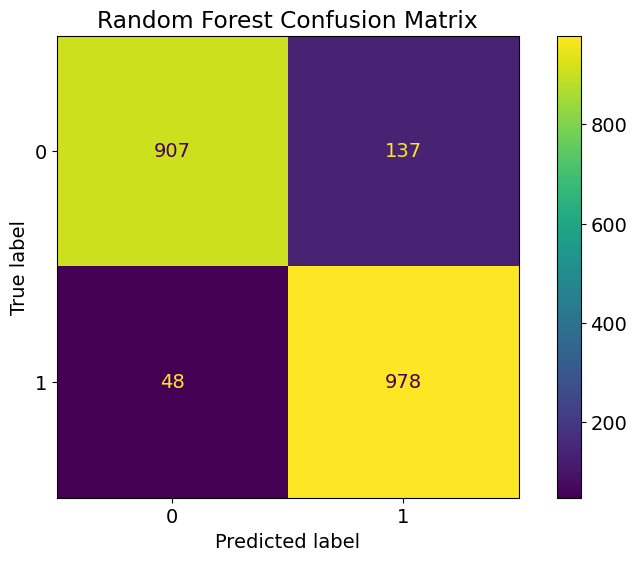

In [21]:
# Plot confusion matrice for random forest
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.savefig('../plots/rf_confusion_matrix.png')
plt.show()

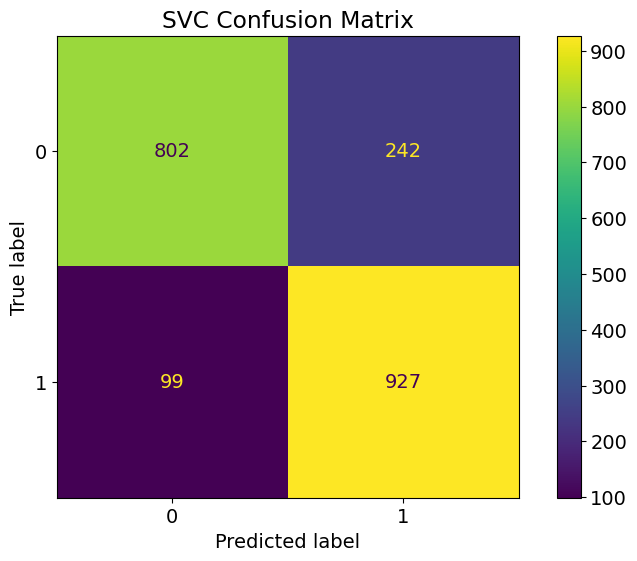

In [22]:
# Plot confusion matrice for SVC
ConfusionMatrixDisplay.from_estimator(best_svc_model, X_test, y_test)
plt.title("SVC Confusion Matrix")
plt.savefig('../plots/svc_confusion_matrix.png')
plt.show()

**Insights:**

- The **Random Forest** model demonstrated superior performance across all metrics compared to the SVC model.
  
- The high precision and recall scores for both classes in the Random Forest model indicate its robustness in identifying both churn and non-churn customers accurately.
  
- The confusion matrix for the Random Forest model shows a high number of correctly classified instances, with relatively fewer false positives and false negatives.

## Save Best model

In [20]:
# Save the Random Forest model as it has the best performance
joblib.dump(best_rf_model, '../models/best_churn_model.joblib')

['../models/best_churn_model.joblib']

In [30]:
#X_test.to_csv('../data/test.csv', index=False)
#X_train.to_csv('../data/train.csv', index=False)
#y_train.to_csv('../data/train_labels.csv', index=False)
#y_test.to_csv('../data/test_labels.csv', index=False)
#pd.Series(rf_y_pred).to_csv('../data/rf_label_pred.csv', index=False)